In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
df_abstract = pd.read_csv('data/GERabstract.csv')
df_detailed = pd.read_csv('data/GERdetailed.csv')

In [5]:
print(df_abstract.columns)

Index(['Zeitstempel', 'How old are you?', 'What is your sex?',
       'Where are you born?',
       'How many online meetings per week do you usually have?',
       'Is it important for you to know what others think about you?',
       'Your thoughts about the system [I found the system complex.]',
       'Your thoughts about the system [I would have needed help to understand the system.]',
       'Your thoughts about the system [I could work with the system daily.]',
       'Your thoughts about the system [By knowing the emotion of the group, the system helped me to readjust my presentation and raise their engagement.]',
       'Your thoughts about the system [I could change my presentation during holding it, to raise the happiness of the viewers.]',
       'Your thoughts about the system [I think it was clear for me why the size of the emojis was changing.]',
       'Your thoughts about the system [I think the system was too complex to understand.]',
       'Your thoughts about the s

In [7]:
# cleanup data frames
def cleanup(df):
    df = df.replace('Your thoughts about the system [','').replace('Neutral', 2)\
    .replace('I do agree',3).replace('I don\'t agree at all',0).replace('I don\'t agree', 1)\
    .replace('I gree entirelly', 4).replace('meetings per week','', regex=True).replace('meetings', ''\
    , regex=True).replace('Your thoughts about the system \[','').replace(']','')
    
    df = df.replace('no', 0).replace('yes', 1)
    df = df.replace(np.nan, '')
    
    shorter_column_names = ['time', 'age', 'sex', 'ethnicity', 'weekly_online_meet', 'others_opinion',\
                        'sys_too_complex', 'system_understood', 'use_daily', 'raise_engagement',\
                        'raise_happiness', 'size_change_understood', 'complexity_of_sys',\
                        'use_makes_happy', 'irritating', 'nice_interface',\
                        'system_felt_valuable', 'suggestions']
    df.columns = shorter_column_names
    return df
    

In [8]:
# Replacement of strings of the system related questions on both surveys
df_abstract = cleanup(df_abstract)
df_detailed = cleanup(df_detailed)

In [9]:
df_abstract[:4]
#df_abstract.count()
#df_detailed.count()

,time,age,sex,ethnicity,weekly_online_meet,others_opinion,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,use_makes_happy,irritating,nice_interface,system_felt_valuable,suggestions
0,2021/07/12 4:42:28 PM OEZ,20-29 years,Male,Europa,3 - 6,0,3,1,2,1,1,1,2,3,0,4,0,
1,2021/07/12 7:27:24 PM OEZ,20-29 years,Male,Europa,3 - 6,1,0,2,1,1,2,2,1,2,0,2,2,
2,2021/07/12 8:35:25 PM OEZ,20-29 years,Male,Europa,3 - 6,1,2,1,1,1,1,3,1,2,3,1,2,Real emojis in the style of e.g. WhatsApp woul...
3,2021/07/14 1:08:01 PM OEZ,20-29 years,Female,Europa,< 2,0,0,1,2,2,3,2,1,2,1,2,2,


In [10]:
df_detailed[:4]

,time,age,sex,ethnicity,weekly_online_meet,others_opinion,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,use_makes_happy,irritating,nice_interface,system_felt_valuable,suggestions
0,2021/07/12 3:29:01 PM OEZ,20-29 years,Other,Europa,3 - 6,0,0,1,3,0,1,4,0,0,1,1,0,I personally would never want to use anything ...
1,2021/07/12 5:34:54 PM OEZ,20-29 years,Male,Europa,3 - 6,0,3,3,3,2,3,1,1,2,3,3,3,The emotes for disengagement and engagement ar...
2,2021/07/13 8:39:48 AM OEZ,30-39 years,Male,Asia,3 - 6,0,2,0,2,3,3,4,0,3,2,1,2,May be smaller icons of Emoji around the corne...
3,2021/07/13 4:02:13 PM OEZ,20-29 years,Female,Asia,3 - 6,0,0,1,0,0,0,1,1,0,4,0,0,I generally do not find the system very helpfu...


In [11]:
df_abstract.describe()

,others_opinion,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,use_makes_happy,irritating,nice_interface,system_felt_valuable
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.583333,1.666667,2.083333,1.583333,1.500000,1.833333,1.833333,1.583333,1.416667,2.083333,1.500000,1.416667
std,0.514929,1.230915,1.164500,0.900337,0.797724,0.834847,1.029857,0.792961,0.996205,1.443376,1.167748,1.083625
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,0.750000
50%,1.000000,2.000000,2.000000,1.500000,1.000000,2.000000,2.000000,2.000000,2.000000,2.500000,1.000000,1.500000
75%,1.000000,3.000000,3.000000,2.000000,2.000000,2.250000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000
max,1.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000


In [12]:
df_detailed.describe()

,others_opinion,sys_too_complex,system_understood,use_daily,raise_engagement,raise_happiness,size_change_understood,complexity_of_sys,use_makes_happy,irritating,nice_interface,system_felt_valuable
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.466667,1.466667,1.866667,2.133333,2.266667,2.200000,2.533333,1.066667,1.600000,1.666667,1.866667,1.666667
std,0.516398,0.990430,0.990430,0.915475,1.099784,1.146423,1.302013,0.798809,0.985611,0.975900,1.060099,1.046536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000
75%,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.000000
max,1.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000


In [13]:
# separate only numeric values
df_abs = df_abstract.iloc[:, 5:-1]
df_det = df_detailed.iloc[:, 5:-1]

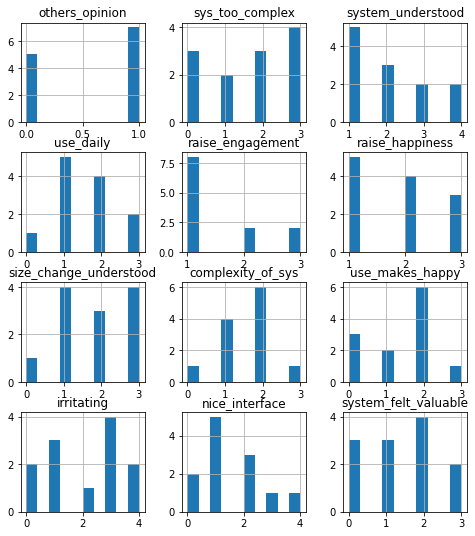

In [14]:
df_abs.hist(figsize = (8,9));

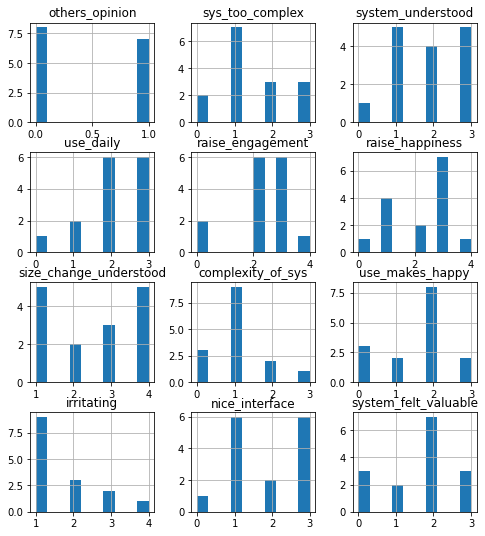

In [15]:
df_det.hist(figsize = (8,9));

From the histogram, it is clear that the data is not normally distributed.
Some normality tests can be done to prove it.
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

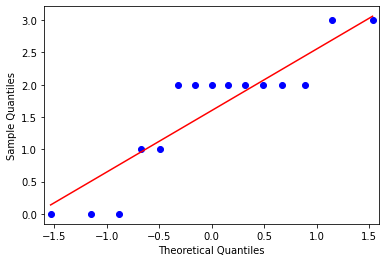

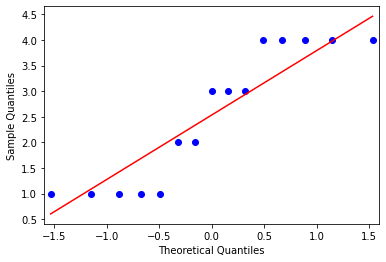

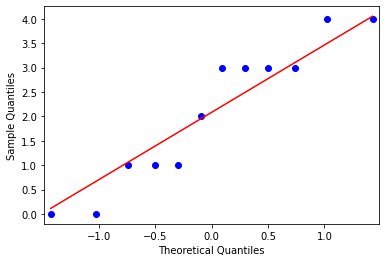

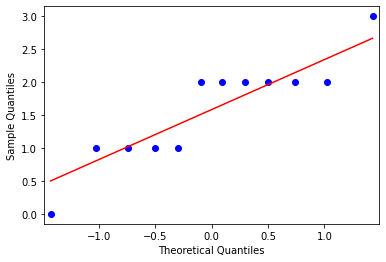

In [16]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df_det['use_makes_happy'], line='s');
qqplot(df_det['size_change_understood'], line='s');
qqplot(df_abs['irritating'], line='s');
qqplot(df_abs['complexity_of_sys'], line='s');

# @Labi, please try it with some of the columns from abstract, 
# and detailed set and show that due to outliers data is likely not from a Gaussian distribution.

Since there are deviations in the QQ plot, the data is not drawn from a Gaussian distribution.

### Shapiro-Wilk test to know if the data was drawn from a Gaussian distribution

In [17]:
from scipy.stats import shapiro
def is_normally_distributed(data, alpha=0.05):
    stat, p = shapiro(data)
    if p > alpha:
        return True
    else:
        return False

In [18]:
for colmn in df_abs.columns:
    print(f'{colmn} is normally distributed: {is_normally_distributed(df_abs[colmn])}')    

others_opinion is normally distributed: False
sys_too_complex is normally distributed: False
system_understood is normally distributed: False
use_daily is normally distributed: True
raise_engagement is normally distributed: False
raise_happiness is normally distributed: False
size_change_understood is normally distributed: True
complexity_of_sys is normally distributed: True
use_makes_happy is normally distributed: False
irritating is normally distributed: True
nice_interface is normally distributed: True
system_felt_valuable is normally distributed: True


In [19]:
tru = 0
fals = 0
for colmn in df_abs.columns:
    if(is_normally_distributed(df_abs[colmn]) == True):
            tru = tru + 1
    else:
            fals = fals + 1
print('Abstract sample:')
print("True counter: ", tru, " False counter: ", fals)

Abstract sample:
True counter:  6  False counter:  6


In [20]:
for colmn in df_det.columns:
    print(f'{colmn} is normally distributed: {is_normally_distributed(df_det[colmn])}')

others_opinion is normally distributed: False
sys_too_complex is normally distributed: False
system_understood is normally distributed: False
use_daily is normally distributed: False
raise_engagement is normally distributed: False
raise_happiness is normally distributed: False
size_change_understood is normally distributed: False
complexity_of_sys is normally distributed: False
use_makes_happy is normally distributed: False
irritating is normally distributed: False
nice_interface is normally distributed: False
system_felt_valuable is normally distributed: False


Since, almost all of the data is not normally distributed, we will use non-parametric methods to check our Null hypothesis, H0: There is no difference in the data distribution of abstract emojis and detailed emojis. 

[https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python] (Nonparametric Satistical test with python)

In [21]:
tru = 0
fals = 0
for colmn in df_abs.columns:
    if(is_normally_distributed(df_det[colmn]) == True):
            tru = tru + 1
    else:
            fals = fals + 1
print('Datailed sample:')
print("True counter: ", tru, " False counter: ", fals)

Datailed sample:
True counter:  0  False counter:  12


In [76]:
pip install mannwhitneyu

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement mannwhitneyu (from versions: none)
ERROR: No matching distribution found for mannwhitneyu
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu
def Mann_Whitney_U_Test(data0, data1, alpha=0.05):
    stat, p = mannwhitneyu(data0, data1)
    if p > alpha:
        return True
    else:
        return False    

In [23]:
for colmn in df_abs.columns:
    print(f'{colmn} in both sets, belongs to same distribution: {Mann_Whitney_U_Test(df_abs[colmn], df_det[colmn])}')    

others_opinion in both sets, belongs to same distribution: True
sys_too_complex in both sets, belongs to same distribution: True
system_understood in both sets, belongs to same distribution: True
use_daily in both sets, belongs to same distribution: True
raise_engagement in both sets, belongs to same distribution: False
raise_happiness in both sets, belongs to same distribution: True
size_change_understood in both sets, belongs to same distribution: True
complexity_of_sys in both sets, belongs to same distribution: False
use_makes_happy in both sets, belongs to same distribution: True
irritating in both sets, belongs to same distribution: True
nice_interface in both sets, belongs to same distribution: True
system_felt_valuable in both sets, belongs to same distribution: True


In [79]:
pip install mannwhitneyu

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement mannwhitneyu (from versions: none)
ERROR: No matching distribution found for mannwhitneyu
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
# Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
def Wilcoxon_signed_rank_Test(data0, data1, alpha=0.05):
    stat, p = mannwhitneyu(data0, data1)
    if p > alpha:
        return True
    else:
        return False

In [25]:
for colmn in df_abs.columns:
    print(f'{colmn} in both sets, belongs to same distribution: {Wilcoxon_signed_rank_Test(df_abs[colmn], df_det[colmn])}')

others_opinion in both sets, belongs to same distribution: True
sys_too_complex in both sets, belongs to same distribution: True
system_understood in both sets, belongs to same distribution: True
use_daily in both sets, belongs to same distribution: True
raise_engagement in both sets, belongs to same distribution: False
raise_happiness in both sets, belongs to same distribution: True
size_change_understood in both sets, belongs to same distribution: True
complexity_of_sys in both sets, belongs to same distribution: False
use_makes_happy in both sets, belongs to same distribution: True
irritating in both sets, belongs to same distribution: True
nice_interface in both sets, belongs to same distribution: True
system_felt_valuable in both sets, belongs to same distribution: True
